In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

Reading Data

In [51]:
df = pd.read_csv("/content/drive/MyDrive/trainDataMM.csv")

df_test = pd.read_csv("/content/drive/MyDrive/testDataMM.csv")

In [54]:
df['Month of Sourcing'] = pd.to_datetime(df['Month of Sourcing'], format='%b-%y')
df_test['Month of Sourcing'] = pd.to_datetime(df['Month of Sourcing'], format='%b-%y')

In [55]:
df

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.76
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,2020-07-01,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,2020-10-01,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,2021-03-01,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,2021-02-01,150.04


In [56]:
df_test

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,2021-05-01,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,2020-10-01,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,2020-12-01,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,2021-02-01,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,2020-11-01,169.42
...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,2020-08-01,89.57
92,NTM3,X1,A8,DIRECT,Large,Powder,2020-11-01,114.57
93,NTM3,X1,A8,DIRECT,Small,Powder,2020-09-01,111.26
94,NTM3,X2,A20,DIRECT,Large,Powder,2020-11-01,32.32


In [6]:
df.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.76


In [7]:
df.tail()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
550171,NTM2,X1,A5,DIRECT,Large,Powder,2020-07-01,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,2020-10-01,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,2021-03-01,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,2021-02-01,150.04
550175,NTM1,X1,A3,DIRECT,Small,Powder,2020-11-01,139.42


<Axes: >

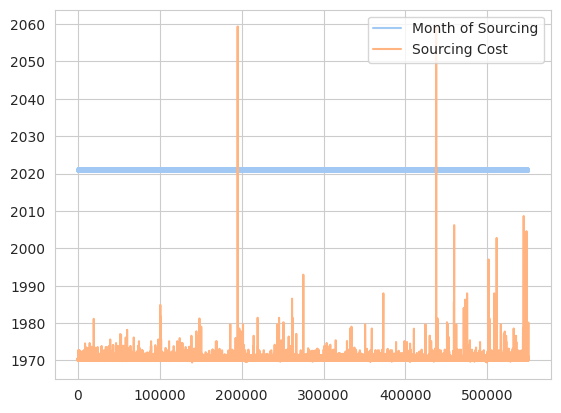

In [8]:
df.plot()

In [9]:
df.describe()

,Month of Sourcing,Sourcing Cost
count,550176,550176.000000
mean,2020-12-08 10:27:28.769848576,108.817286
min,2020-07-01 00:00:00,-196.070000
25%,2020-10-01 00:00:00,57.000000
50%,2020-12-01 00:00:00,132.000000
75%,2021-03-01 00:00:00,146.150000
max,2021-05-01 00:00:00,32632.500000
std,NaN,104.390093


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ProductType        550176 non-null  object        
 1   Manufacturer       550176 non-null  object        
 2   Area Code          550176 non-null  object        
 3   Sourcing Channel   550176 non-null  object        
 4   Product Size       550176 non-null  object        
 5   Product Type       550176 non-null  object        
 6   Month of Sourcing  550176 non-null  datetime64[ns]
 7   Sourcing Cost      550176 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 33.6+ MB


In [11]:
df.nunique()

ProductType             3
Manufacturer            3
Area Code              45
Sourcing Channel        4
Product Size            3
Product Type            2
Month of Sourcing      11
Sourcing Cost        4529
dtype: int64

In [12]:
df.isnull()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
550171,False,False,False,False,False,False,False,False
550172,False,False,False,False,False,False,False,False
550173,False,False,False,False,False,False,False,False
550174,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum() #no missing values

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [14]:
df.shape

(550176, 8)

In [16]:
df

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,2021-05-01,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,2020-10-01,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,2020-12-01,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,2021-02-01,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,2020-11-01,197.76
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,2020-07-01,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,2020-10-01,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,2021-03-01,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,2021-02-01,150.04


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ProductType        550176 non-null  object        
 1   Manufacturer       550176 non-null  object        
 2   Area Code          550176 non-null  object        
 3   Sourcing Channel   550176 non-null  object        
 4   Product Size       550176 non-null  object        
 5   Product Type       550176 non-null  object        
 6   Month of Sourcing  550176 non-null  datetime64[ns]
 7   Sourcing Cost      550176 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 33.6+ MB


In [18]:
df1 = df.set_index("Month of Sourcing")
df1

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost
Month of Sourcing,,,,,,,
2021-05-01,NTM3,X1,A28,WHOLESALE,Large,Powder,10.16
2020-10-01,NTM2,X1,A9,DIRECT,Large,Powder,134.28
2020-12-01,NTM3,X2,A20,DIRECT,Large,Powder,12.46
2021-02-01,NTM3,X1,A18,WHOLESALE,Small,Powder,107.22
2020-11-01,NTM2,X1,A28,DIRECT,Large,Liquid,197.76
...,...,...,...,...,...,...,...
2020-07-01,NTM2,X1,A5,DIRECT,Large,Powder,136.47
2020-10-01,NTM3,X1,A14,DIRECT,Large,Liquid,72.56
2021-03-01,NTM2,X1,A5,DIRECT,Small,Powder,147.64


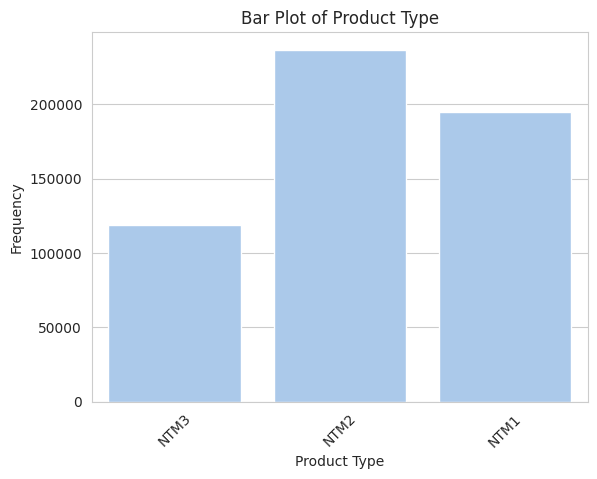

In [19]:
import seaborn as sns

# Bar plot for 'Product Type'
sns.countplot(data=df, x='ProductType')
plt.xlabel('Product Type')
plt.ylabel('Frequency')
plt.title('Bar Plot of Product Type')
plt.xticks(rotation=45)
plt.show()


#Basic analysis after reading data :

####- It is seen that dataset here has 8 main features and which of one is a float i.e our Sourcing Cost and other are objects or say catagorical data except date .

####- After seeing the null values and missing values it is seen there are no missing values as such.

#Product type :-

####- It is seen there are total of 3 Product types namely- NTM1, NTM2, NTM3 and a bar plot above shows the frquency for the same in dataset, and it can be infered that NTM2 has highest frequence, a deeper analysis must be taken to know realtions about product type which results in above chart.


####- The below plot does shows us that there is one value way far from the data points as scattered which may be sometimes said as a outlier but we will have to analyse the point in deep to conclude about the outliers.

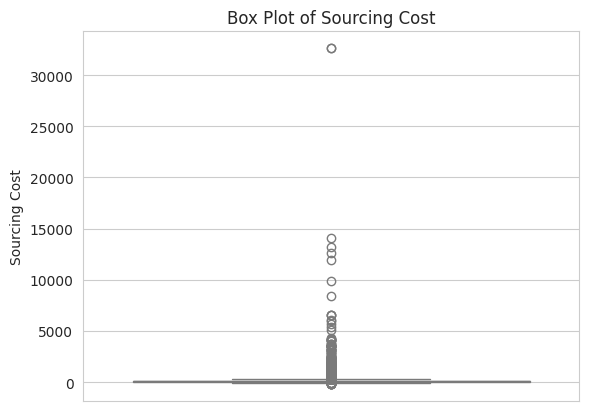

In [20]:
import seaborn as sns

# Box plot for 'Sourcing Cost'
sns.boxplot(data=df, y='Sourcing Cost')
plt.ylabel('Sourcing Cost')
plt.title('Box Plot of Sourcing Cost')
plt.show()


####- Expanding idea of outlier from previous infered plot, it is still seen there this point exist away from datapoints from month oct-2020. with a sourcing cost of above 30,000, and seems the highest till now as most far away.


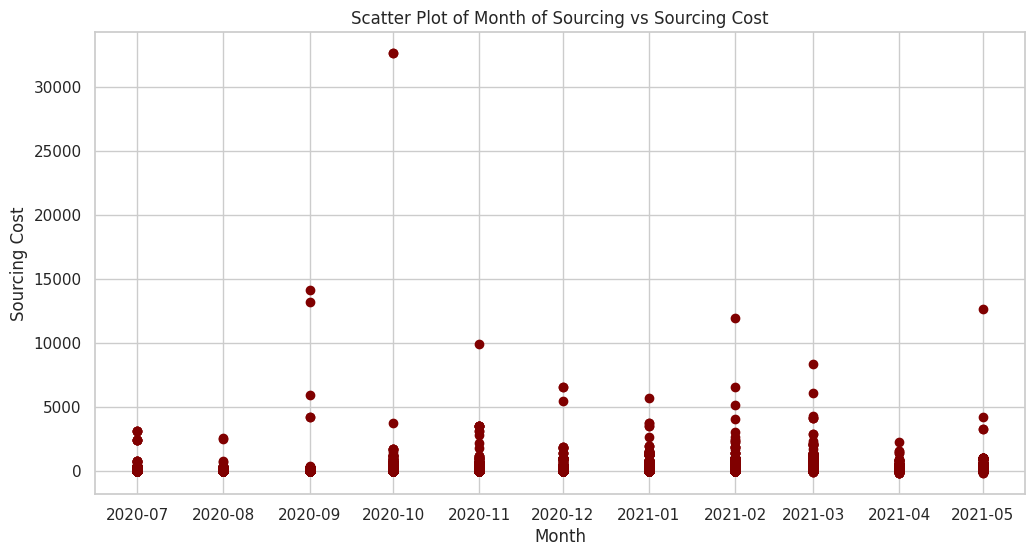

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(df['Month of Sourcing'], df['Sourcing Cost'], color='maroon')
plt.xlabel('Month')
plt.ylabel('Sourcing Cost')
plt.title('Scatter Plot of Month of Sourcing vs Sourcing Cost')
plt.show()


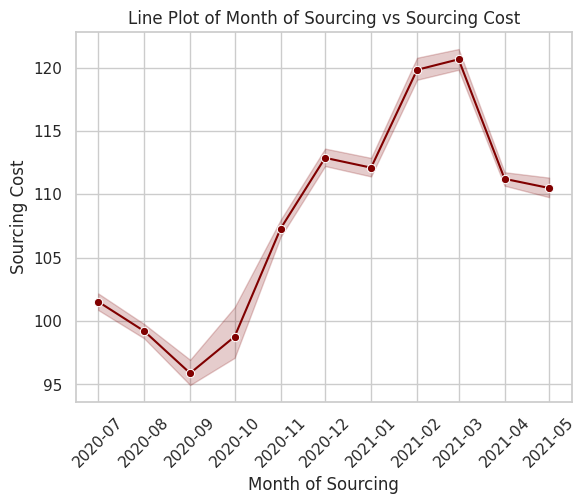

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Line plot using Seaborn
sns.lineplot(data=df, x='Month of Sourcing', y='Sourcing Cost', color='maroon', marker='o')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.title('Line Plot of Month of Sourcing vs Sourcing Cost')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [80]:
df[df['Month of Sourcing'].dt.to_period('M') == '2021-03']


,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
7,NTM2,X1,A29,DIRECT,Small,Powder,2021-03-01,90.78
9,NTM3,X2,A20,DIRECT,Large,Powder,2021-03-01,85.71
10,NTM2,X1,A7,ECOM,Small,Powder,2021-03-01,141.58
20,NTM2,X1,A7,ECOM,Large,Powder,2021-03-01,144.21
25,NTM2,X1,A7,ECOM,Large,Powder,2021-03-01,141.58
...,...,...,...,...,...,...,...,...
550121,NTM1,X2,A40,DIRECT,Large,Liquid,2021-03-01,24.57
550138,NTM1,X1,A33,DIRECT,Large,Powder,2021-03-01,133.30
550154,NTM1,X2,A42,DIRECT,Large,Powder,2021-03-01,228.73
550157,NTM2,X1,A5,DIRECT,Large,Powder,2021-03-01,158.52


In [24]:
sorted_df = df.sort_values(by='Month of Sourcing')

# Display the sorted DataFrame
print(sorted_df)


       ProductType Manufacturer Area Code Sourcing Channel Product Size  \
275087        NTM1           X1        A8           DIRECT        Large   
127677        NTM2           X1       A29           DIRECT        Small   
127666        NTM1           X1       A10           DIRECT        Large   
337857        NTM1           X1        A3           DIRECT        Small   
337867        NTM2           X1       A26           DIRECT        Small   
...            ...          ...       ...              ...          ...   
428269        NTM2           X1       A28           DIRECT        Small   
428244        NTM3           X1       A25           RETAIL        Large   
428242        NTM1           X1        A1           DIRECT        Small   
190132        NTM2           X1       A28           DIRECT        Large   
0             NTM3           X1       A28        WHOLESALE        Large   

       Product Type Month of Sourcing  Sourcing Cost  
275087       Powder        2020-07-01       

#Knowing about datapoints dsitribution in other features.

####Here we see a barplot which shows 4 types sourcing was performed and it is clearly seen that 'Direct' sale is more than any other retail platform or ecom platform. So the maximum points may belong to direct catagory.

<ipython-input-58-cd9615f374e7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sourcing Channel', data=df, palette='rocket')


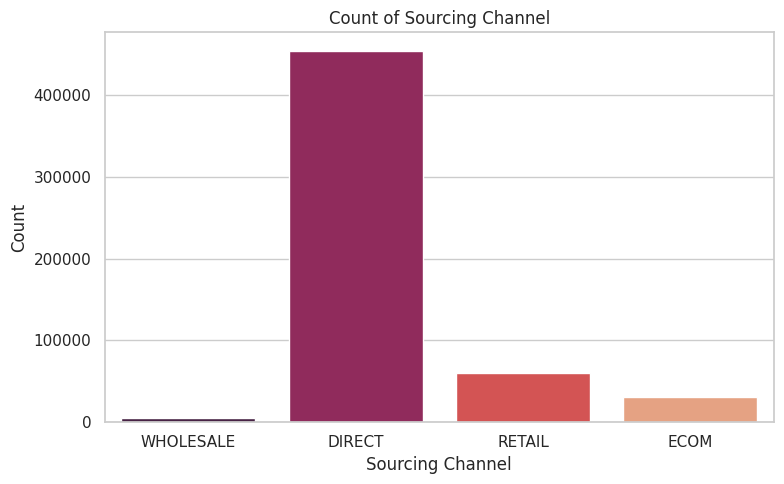

In [58]:
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(8, 5))
sns.countplot(x='Sourcing Channel', data=df, palette='rocket')
plt.title('Count of Sourcing Channel')
plt.xlabel('Sourcing Channel')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

####Adding to previous analysis about the distribution of product among the 4 types, we still see that the outstanding datapoint still belongs to "DIRECT" catagory. Whereas there is seen not much progress in WHOLESALE and ECOM, and RETAIL still is better than ECOM and WHOLESALE.

<ipython-input-83-658dc24f5ae6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y="Sourcing Cost", x='Sourcing Channel', palette = "rocket")


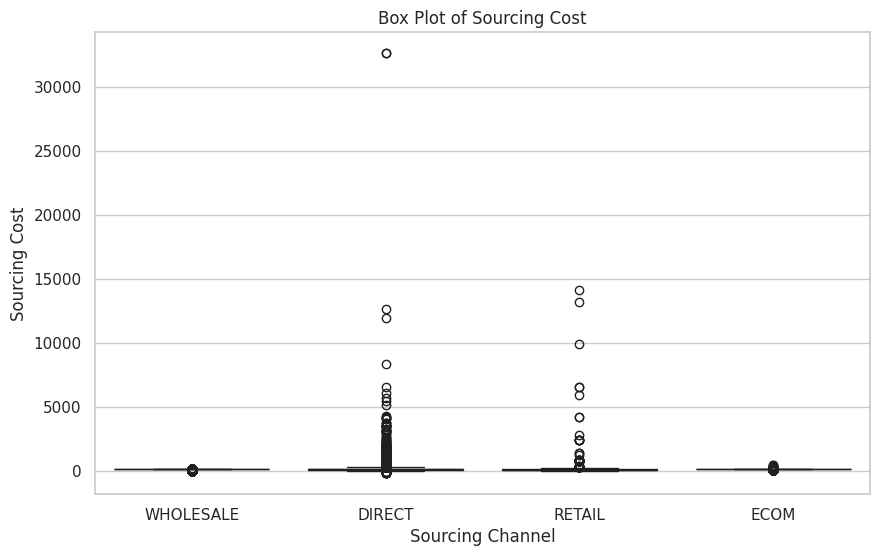

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(10, 6))  # Adjust width and height as needed

# Box plot for 'Sourcing Cost'
sns.boxplot(data=df, y="Sourcing Cost", x='Sourcing Channel', palette = "rocket")
plt.ylabel('Sourcing Cost')
plt.title('Box Plot of Sourcing Cost')
plt.show()

<ipython-input-40-260556e4c221>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Sourcing Cost', y='Manufacturer', inner='box', palette='Dark2')


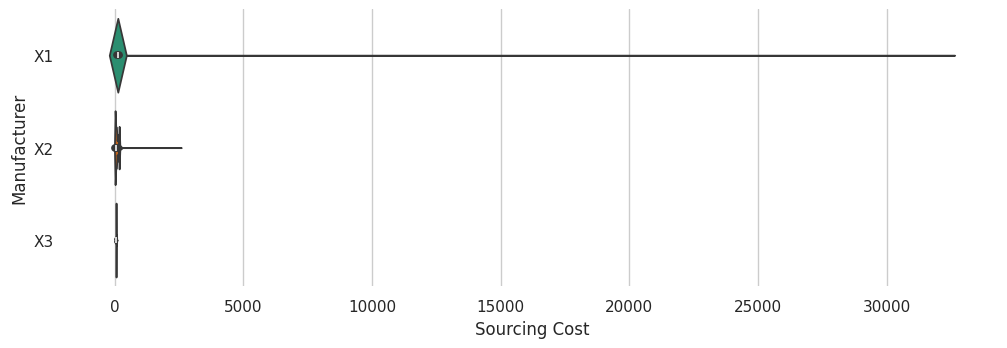

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Manufacturer'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Sourcing Cost', y='Manufacturer', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

##We see that POWDER type was sold more than LIQUID, which indirectly can also  be stated that POWDER type is also sold most in direct.

<ipython-input-60-e51163c8355c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Product Type", palette="rocket")


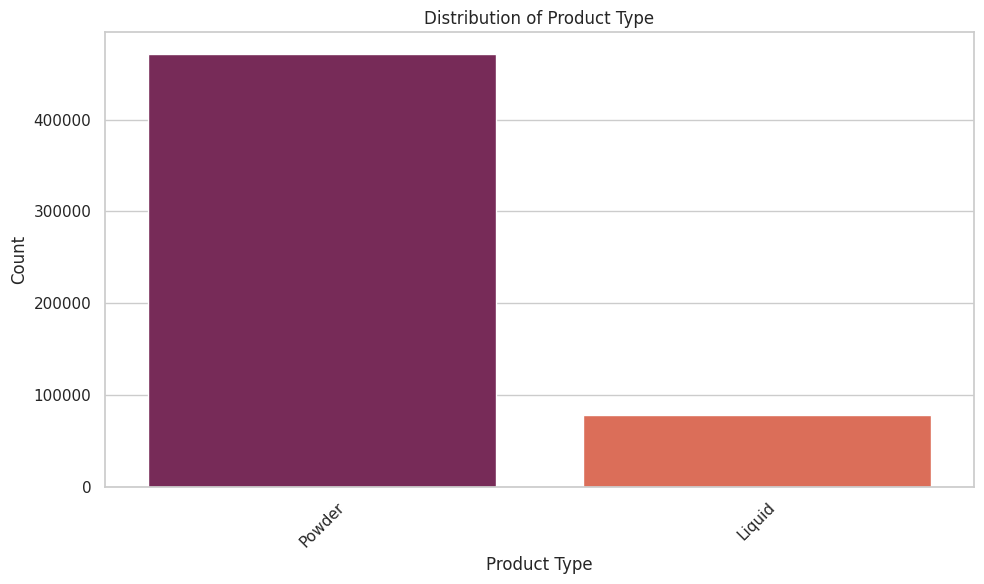

In [60]:
sns.set(style="whitegrid", palette="rocket")

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Product Type", palette="rocket")
plt.title("Distribution of Product Type")
plt.xlabel("Product Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Tracking patterns and checking temporal data for furthur analysis :-
###As known we have a dataset of time series of a product sold, but still it is necessary to check if to apply Time Series Analysis or not.
####1) We need to check if tompral data is there or not, which is seen it's available so there are still chances of Time series analysis
###BUT, the 2nd condition is :
####2) There should be some pattern analysis or seasonal pattern observed for getting to start with a time series analysis.
####The pattern analysis is important as it needs a period which we have to hypertune which tells what period you see pattern change or want to analysis about the same.

#### Now the above 2 rules are very important to get into time series analysis.

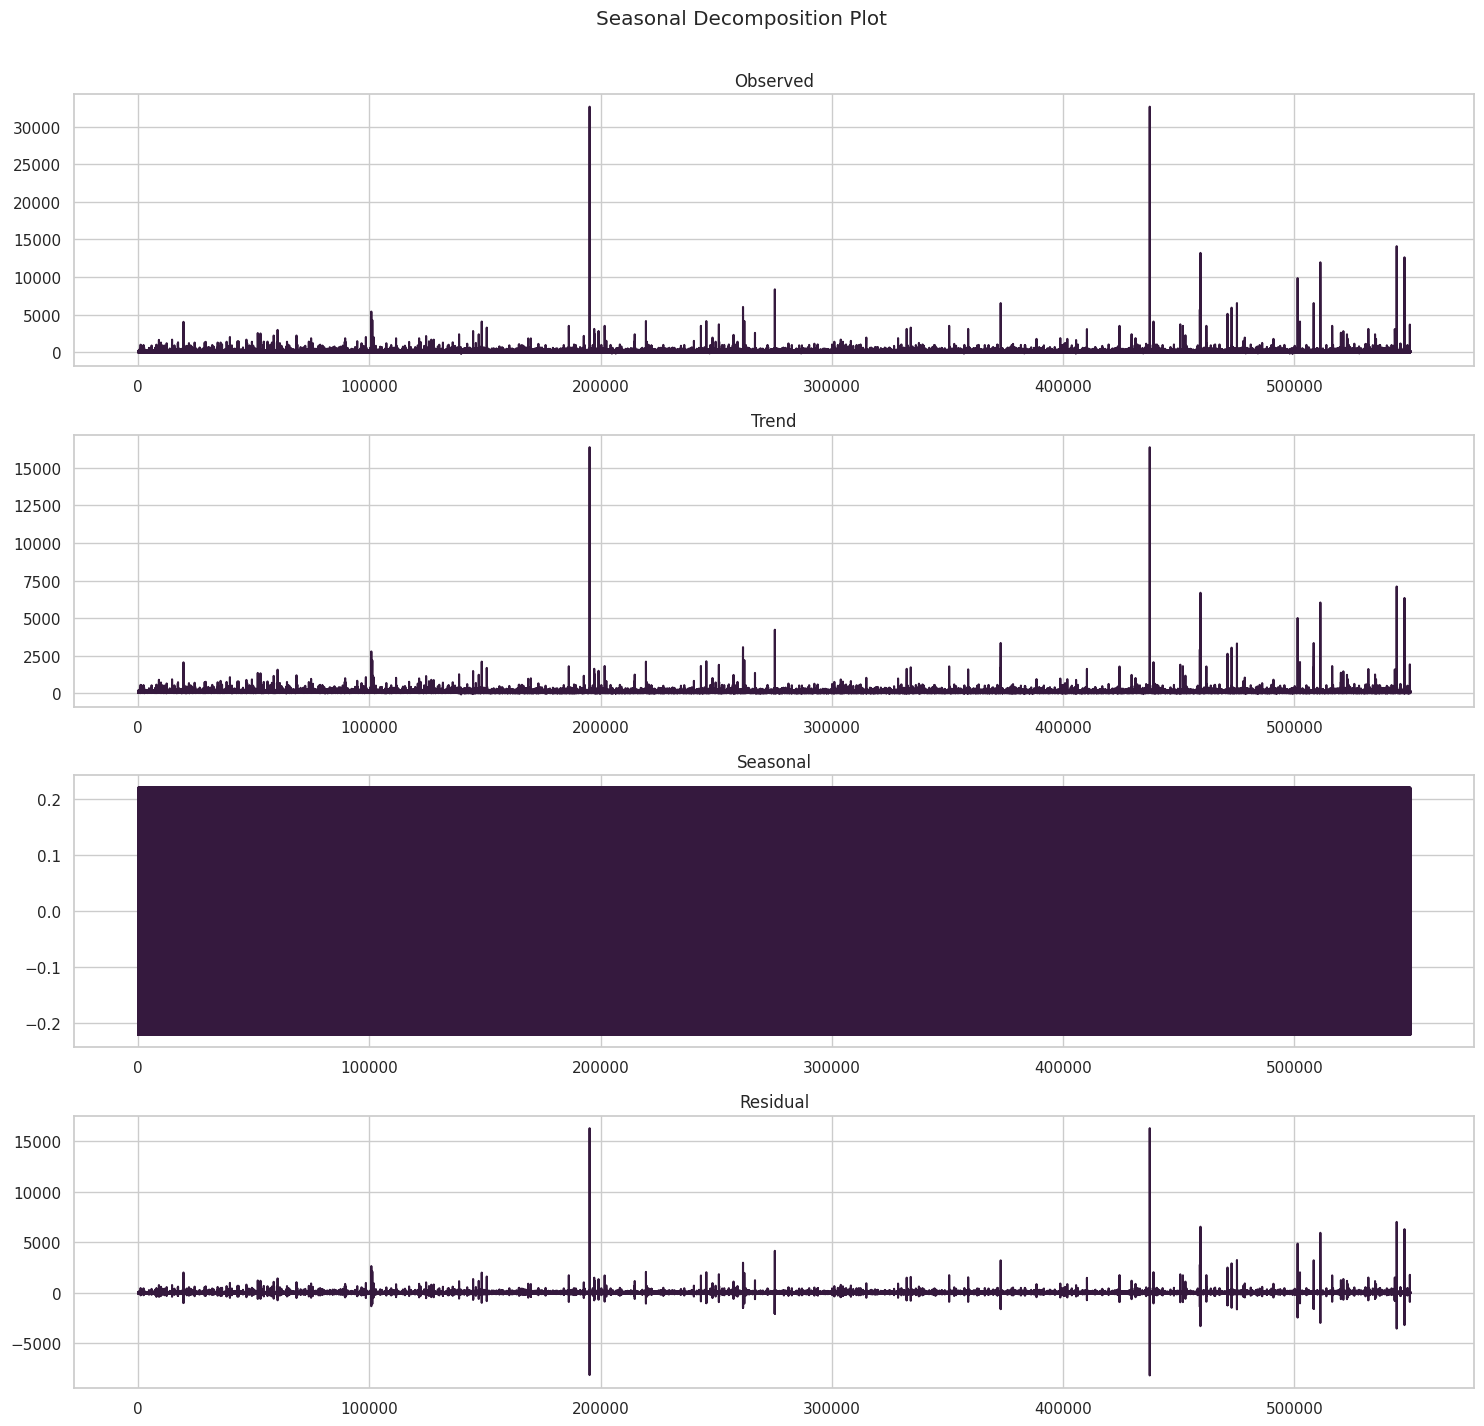

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Set seaborn style and palette
sns.set_style("whitegrid")
sns.set_palette("rocket")

# Plot seasonal decomposition
plt.figure(figsize=(15, 15))
decomposition = seasonal_decompose(df['Sourcing Cost'], model='additive', period=2)

# Plot decomposition components
plt.subplot(4, 1, 1)
decomposition.observed.plot()
plt.title('Observed')

plt.subplot(4, 1, 2)
decomposition.trend.plot()
plt.title('Trend')

plt.subplot(4, 1, 3)
decomposition.seasonal.plot()
plt.title('Seasonal')

plt.subplot(4, 1, 4)
decomposition.resid.plot()
plt.title('Residual')

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Seasonal Decomposition Plot')

# Show plot
plt.show()

## <b> <u>Time series inferences :- </u>
#### It is seen a sudden and a unusual seasonal plot which is a only reactangle with a solid colour, even though the target variable is being observed which is the numeric data, and for which this plot is very unusual.
### It is known that "If your seasonal plot appears as a solid rectangle with consistent color throughout the entire time period, indicating no discernible seasonality one should not look forward to a good output through Time Series Analysis"

## <b> <u> To know if it's okay to do a time series it should satisfy below conditions:- </u>

#### No Seasonality: If the seasonal plot appears as a solid rectangle with consistent color throughout the entire time period, it suggests that there is no clear seasonal pattern in the data. This could occur when the data is relatively constant over time or when the seasonal variations are very subtle and not visually distinguishable.

#### Constant Seasonality: Alternatively, if the seasonal plot shows a solid rectangle with a consistent color but contains variations within that rectangle, it indicates that the seasonal pattern remains constant across all time periods. In other words, the data exhibits the same seasonal behavior throughout the entire time series without any significant changes.

#### Incorrect Plotting or Data Issue: It's also possible that there might be an issue with how the plot is generated or with the data itself. For example, if the data is incorrectly formatted or if there are missing values, it could result in unexpected plot outputs.

#### The 1st two are familiar by analysis and plot, and 3rd one is Data issue, which states or mentions missing values, so this should not be an issue as there are no missing values as such hence 1nd and 2nd makes us conclude a bit that time series analysis might not result in best output.

<ipython-input-86-de4da2a0b30c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Month of Sourcing", y='Sourcing Cost', palette = "rocket")


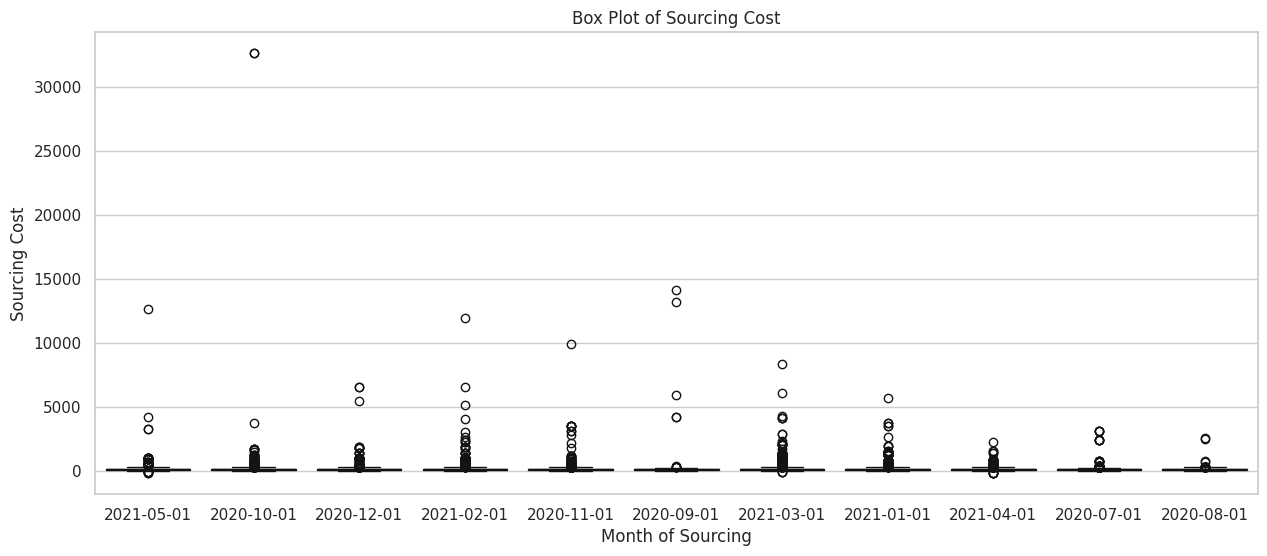

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(15, 6))  # Adjust width and height as needed

# Box plot for 'Sourcing Cost'
sns.boxplot(data=df, x="Month of Sourcing", y='Sourcing Cost', palette = "rocket")
plt.ylabel('Sourcing Cost')
plt.title('Box Plot of Sourcing Cost')
plt.show()


## <b> <u> Below is the plot for cost over time by product size</u>
#### from the plot below and analysis above it is seen and said that there exist a point or data from oct-20 which lies out of the data points which basically is the highest source price seen, and below it is seen that according to size that data or product belonged to extra large catagory and similarly seeing the trend, extra large product has a very volatile graph while large and small are quite uniform in themselves. so seasonally it is seen that large and small products maintain their sales while there is no solid conclusion for extra large product.

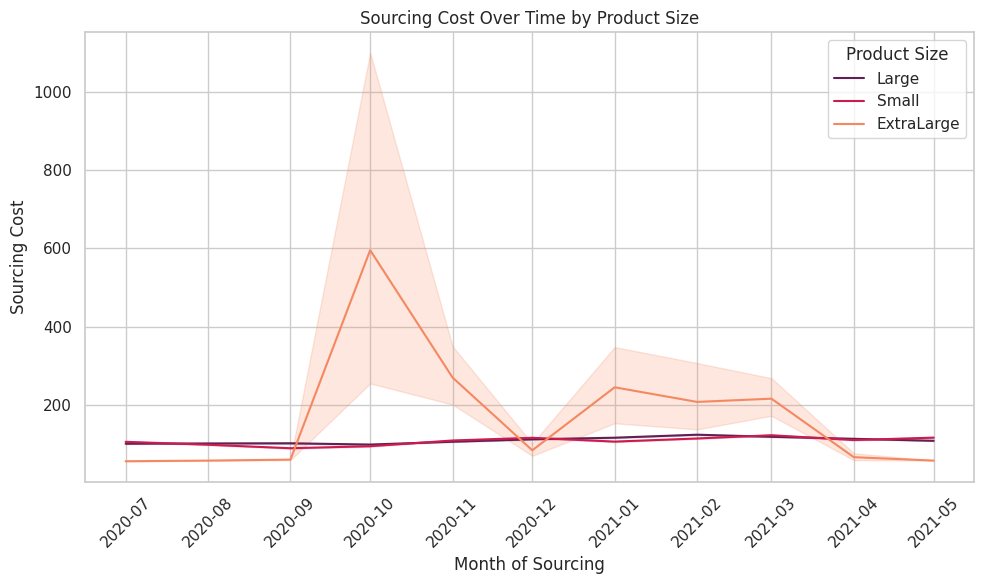

In [62]:
sns.set(style="whitegrid", palette="rocket")

# Plot Sourcing Cost over time by Product Size
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Month of Sourcing", y="Sourcing Cost", hue="Product Size", palette="rocket")
plt.title("Sourcing Cost Over Time by Product Size")
plt.xlabel("Month of Sourcing")
plt.ylabel("Sourcing Cost")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-100-47692c7daabe>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y="Product Size", x='ProductType', palette = "rocket")


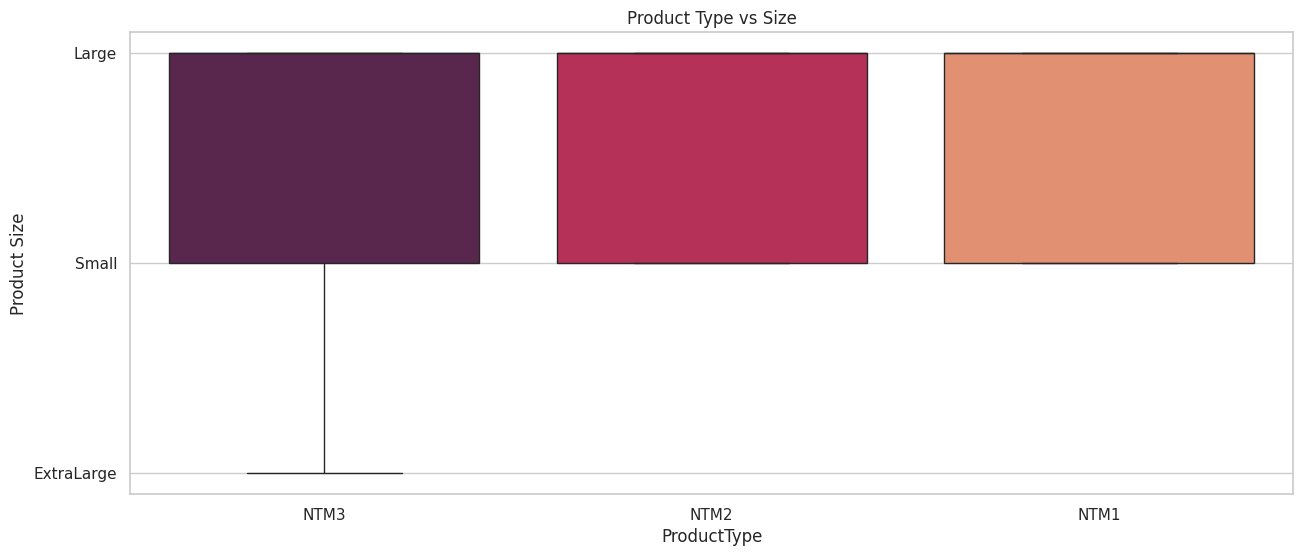

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(15, 6))  # Adjust width and height as needed

# Box plot for 'Sourcing Cost'
sns.boxplot(data=df, y="Product Size", x='ProductType', palette = "rocket")
plt.ylabel('Product Size')
plt.title('Product Type vs Size')
plt.show()


<ipython-input-95-699333630bde>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y="Product Size", x='Product Type', palette = "rocket")


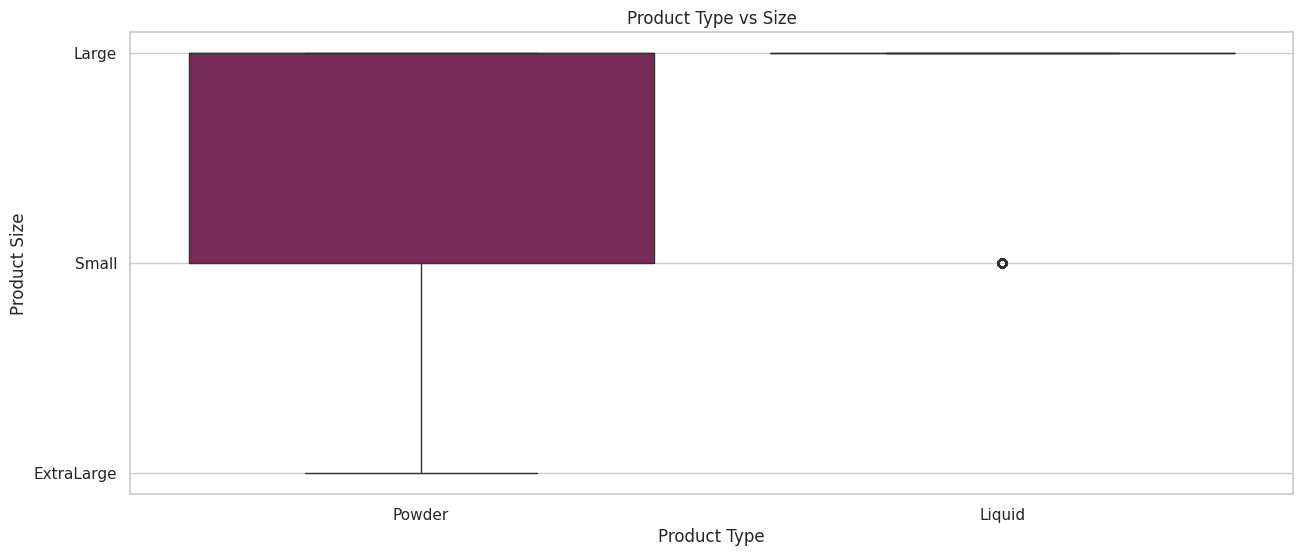

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(15, 6))  # Adjust width and height as needed

# Box plot for 'Sourcing Cost'
sns.boxplot(data=df, y="Product Size", x='Product Type', palette = "rocket")
plt.ylabel('Product Size')
plt.title('Product Type vs Size')
plt.show()


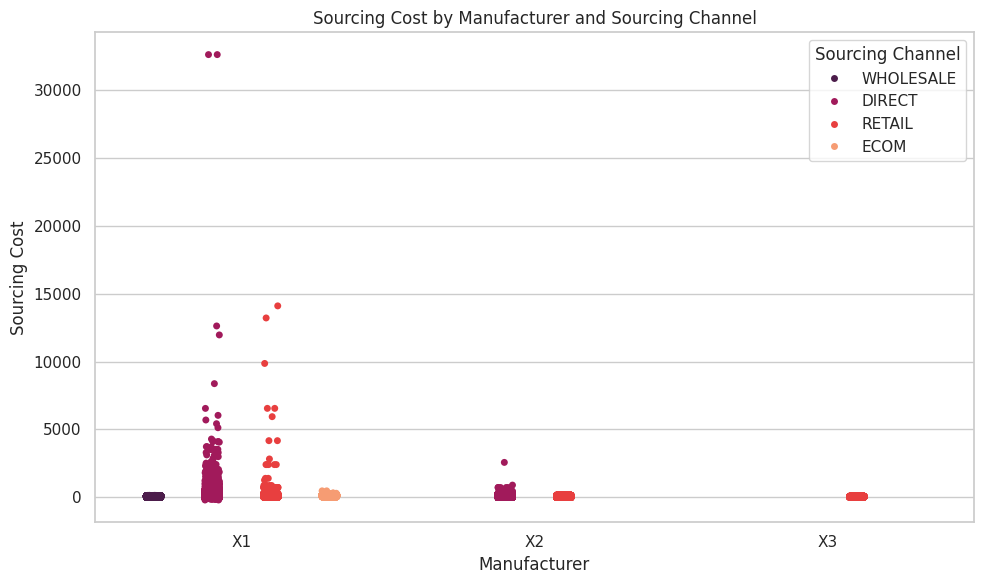

In [98]:
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x="Manufacturer", y="Sourcing Cost", hue="Sourcing Channel", palette="rocket", dodge=True)
plt.title("Sourcing Cost by Manufacturer and Sourcing Channel")
plt.xlabel("Manufacturer")
plt.ylabel("Sourcing Cost")
plt.legend(title="Sourcing Channel")
plt.tight_layout()
plt.show()

### Adding to previous content it can be said that the extralarge product lies under manufacturer X1 and is a POWDER and DIRECT sale under NTM3 product type as seem in the box plot which coveres the percentile for extra large.

#### It is seen that products from X1 are most in demand and are sold most and even though X1 handels ecom and wholesale while X2 and X3 dosent.

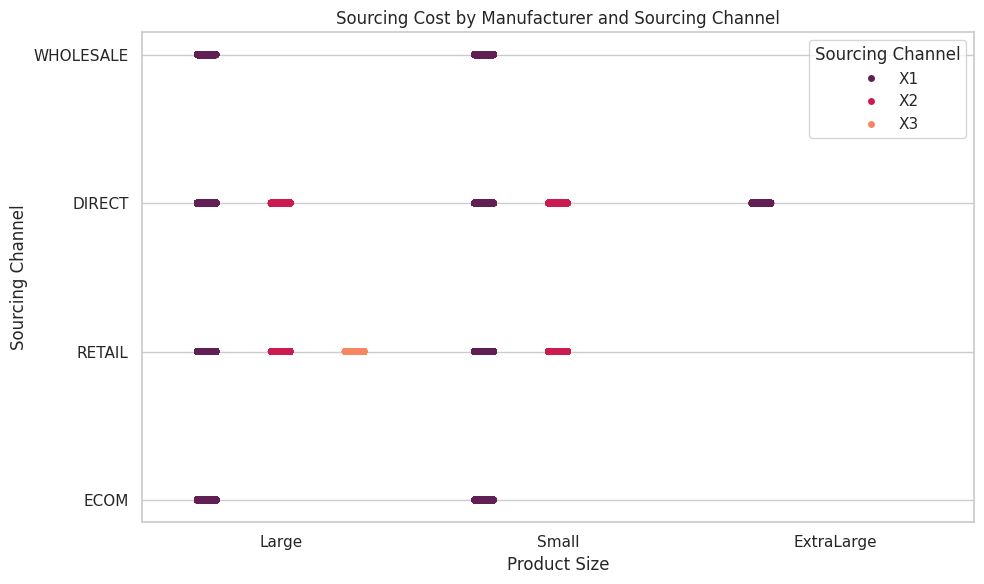

In [119]:
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(10, 6))
sns.stripplot(data=df, hue="Manufacturer", x="Product Size", y="Sourcing Channel", palette="rocket", dodge=True)
plt.title("Sourcing Cost by Manufacturer and Sourcing Channel")
plt.ylabel("Sourcing Channel")
plt.xlabel("Product Size")
plt.legend(title="Sourcing Channel")
plt.tight_layout()
plt.show()

### It is seen that NTM1 and NTM2 has always been higher than NTM3 and which can tell us that price wise those were high but stayed uniform seasonally but if NTM3,the volatilaty, previous analysis says that NTM3 has highest sale product in extralarge product in oct-20 but below it might seem its still below NTM1 and NTM2 but it says that its not pricy than NTM1 and NTM2 but in oct-20 1 and 2 went below the sourcing cost where as at that specific moment NTM3 has a boost which shows the outlier or far away datapoint cause NTM3 spiked up by the sale of extra large when NTM1 and 2 were below the uniform line a bit NTM3 went way over.

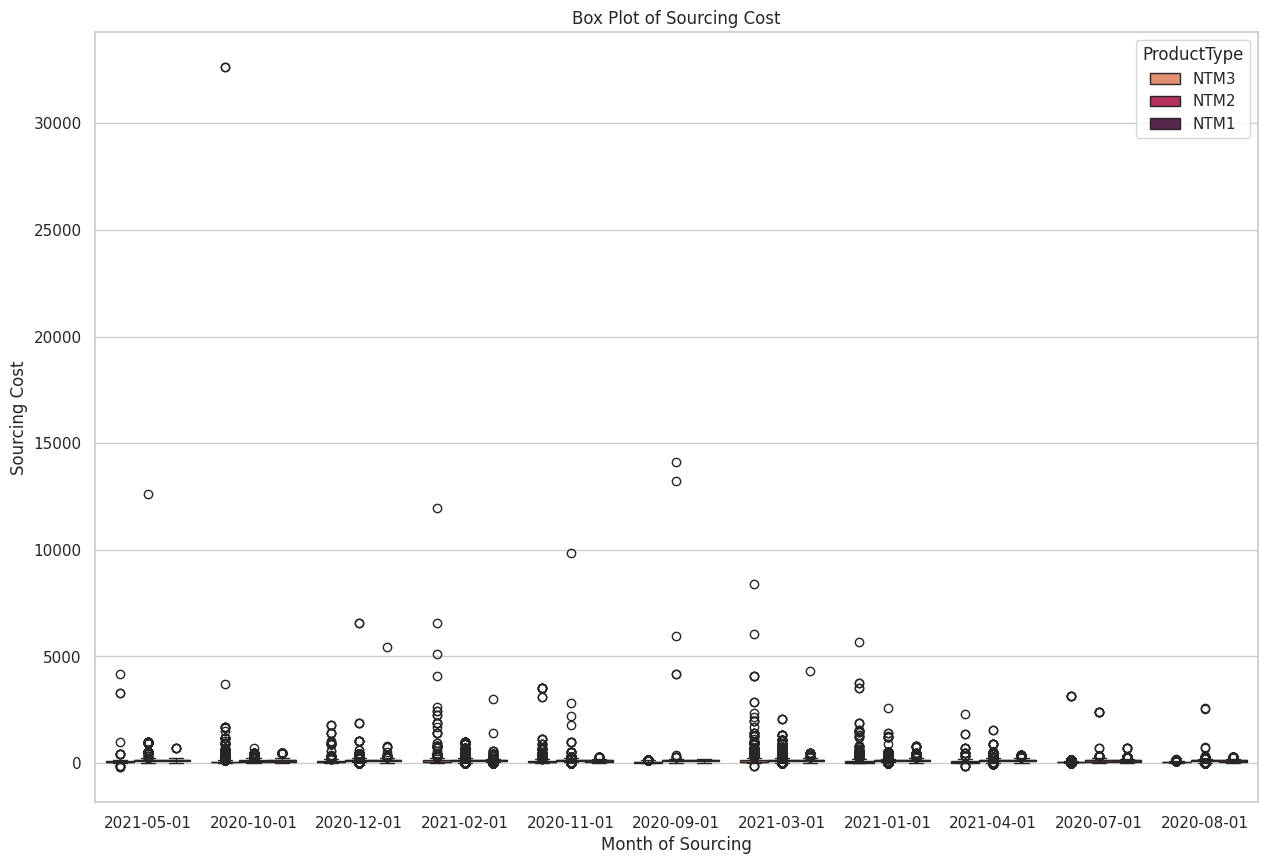

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(15, 10))  # Adjust width and height as needed

# Box plot for 'Sourcing Cost'
sns.boxplot(data=df, x="Month of Sourcing", y="Sourcing Cost", hue="ProductType", patch_artist=True, palette = "rocket_r")
plt.ylabel('Sourcing Cost')
plt.title('Box Plot of Sourcing Cost')
plt.show()

In [115]:
df.max()

ProductType                         NTM3
Manufacturer                          X3
Area Code                             A9
Sourcing Channel               WHOLESALE
Product Size                       Small
Product Type                      Powder
Month of Sourcing    2021-05-01 00:00:00
Sourcing Cost                    32632.5
dtype: object

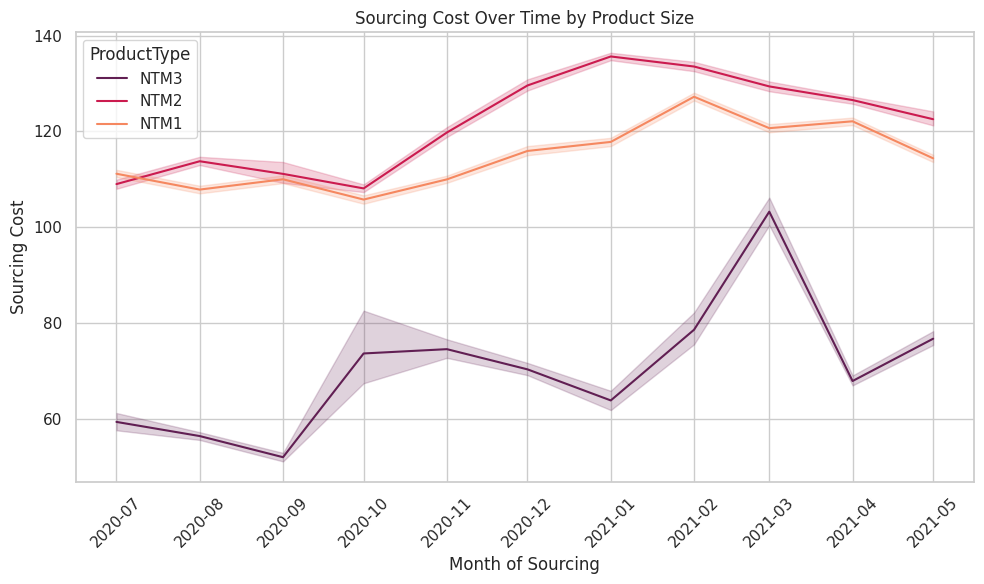

In [30]:
sns.set(style="whitegrid", palette="pastel")

# Plot Sourcing Cost over time by Product Size
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Month of Sourcing", y="Sourcing Cost", hue="ProductType", palette="rocket")
plt.title("Sourcing Cost Over Time by Product Size")
plt.xlabel("Month of Sourcing")
plt.ylabel("Sourcing Cost")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-32-8896cc015756>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Product Type", y='Sourcing Cost', palette = "rocket")


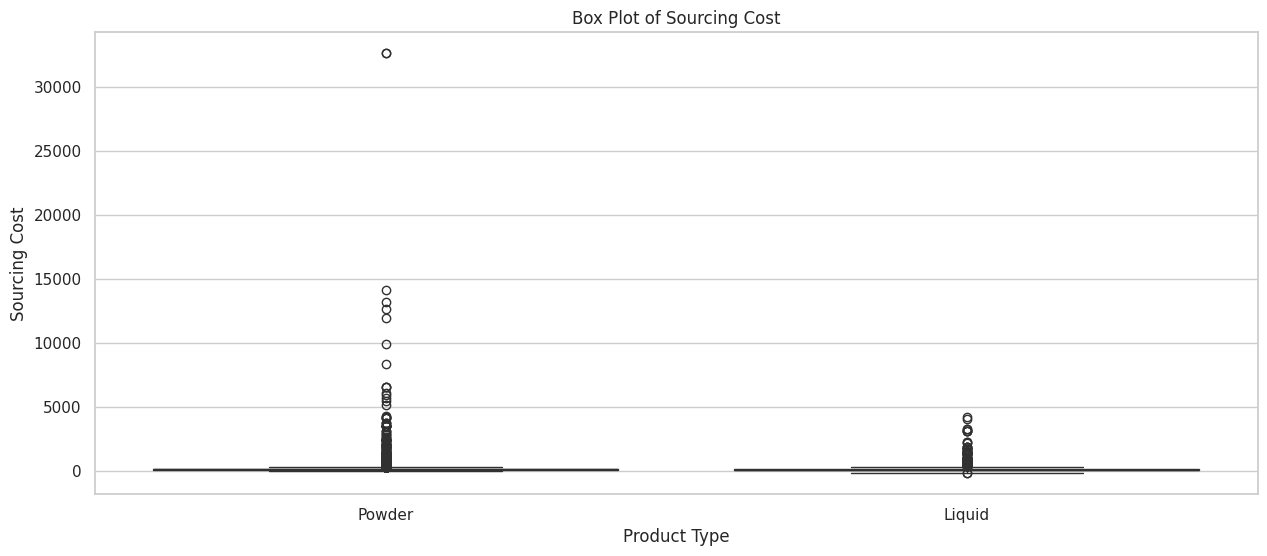

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(15, 6))  # Adjust width and height as needed

# Box plot for 'Sourcing Cost'
sns.boxplot(data=df, x="Product Type", y='Sourcing Cost', palette = "rocket")
plt.ylabel('Sourcing Cost')
plt.title('Box Plot of Sourcing Cost')
plt.show()

<ipython-input-33-76a18ae63d37>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="ProductType", y='Sourcing Cost', palette = "rocket")


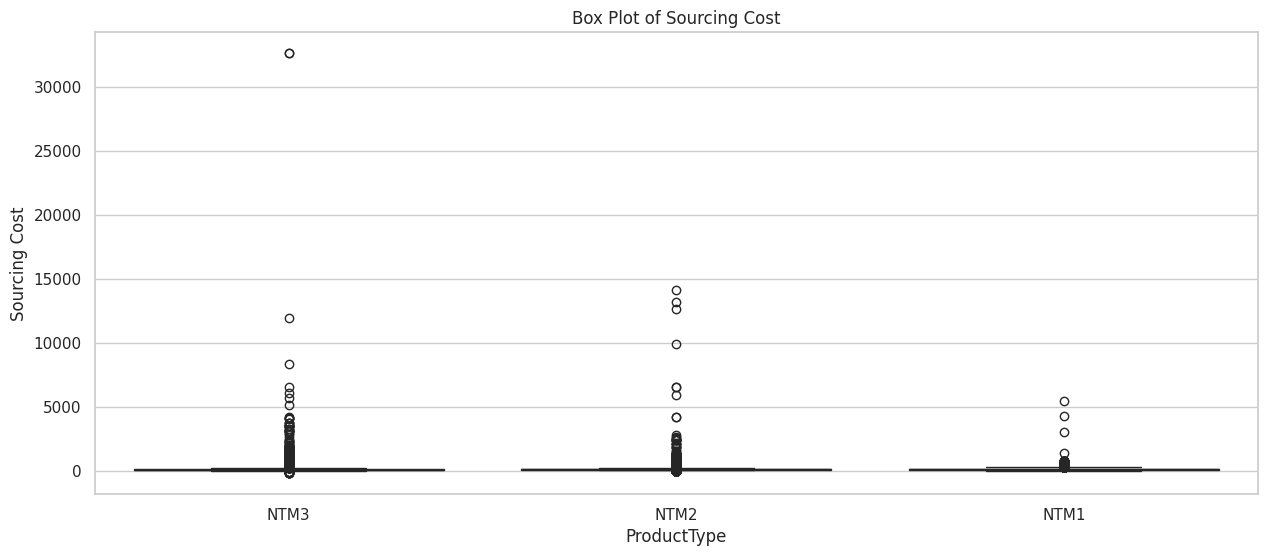

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(15, 6))  # Adjust width and height as needed

# Box plot for 'Sourcing Cost'
sns.boxplot(data=df, x="ProductType", y='Sourcing Cost', palette = "rocket")
plt.ylabel('Sourcing Cost')
plt.title('Box Plot of Sourcing Cost')
plt.show()

###Below are box plot that shows Area code vs Manufacturer and it clearly shows that the point which is far is out of x2 and x3 as its quartiles lies low and median is way deviated, from the box plot of Area vs sourcing cost shows that x1 vox plot has median of A35 and also A35 vs sourcing cost shows the highest point where median lies.

<ipython-input-34-4f4c8f0ac655>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y="Area Code", x='Manufacturer', palette = "rocket")


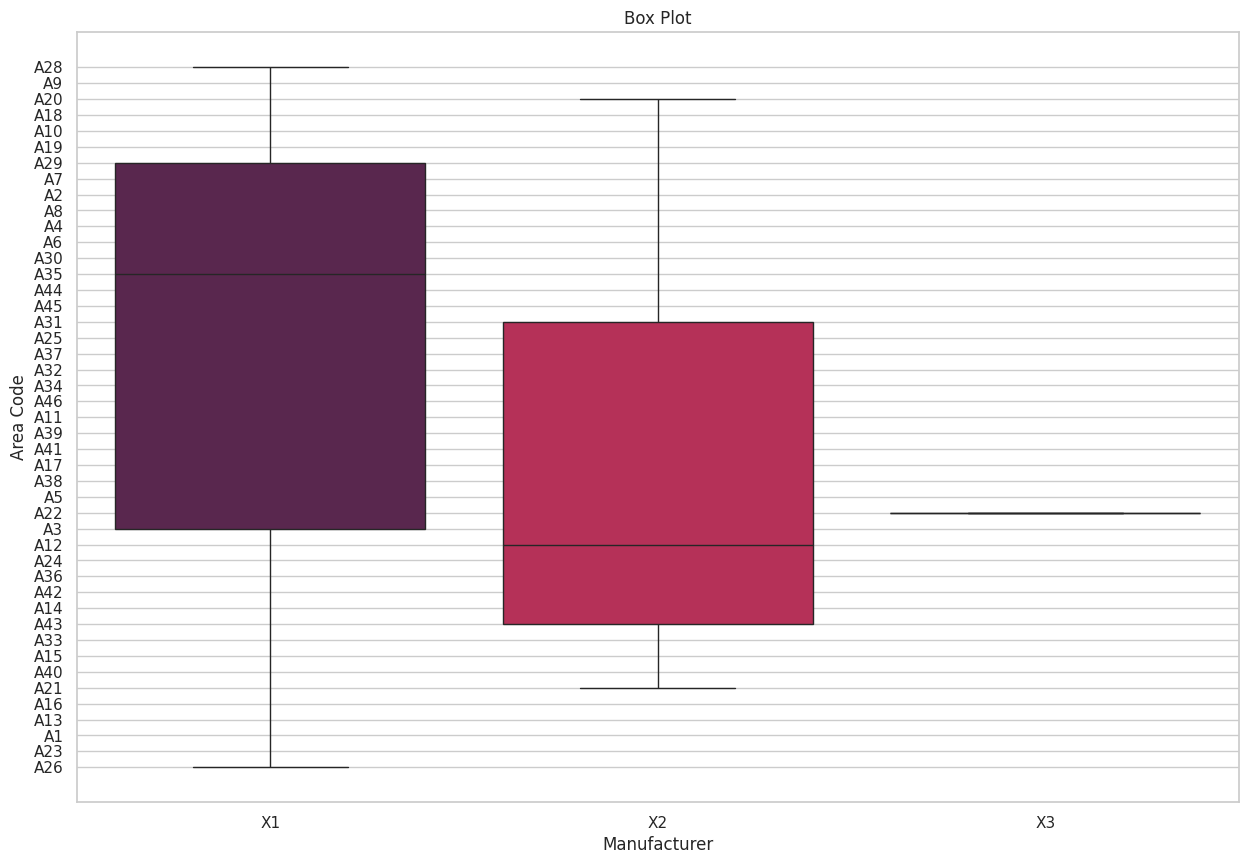

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(15, 10))  # Adjust width and height as needed

# Box plot for 'Sourcing Cost'
sns.boxplot(data=df, y="Area Code", x='Manufacturer', palette = "rocket")
plt.ylabel('Area Code')
plt.xlabel('Manufacturer')
plt.title('Box Plot')
plt.show()

<ipython-input-48-9bf1b9b62129>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Area Code", y='Sourcing Cost', palette = "rocket")


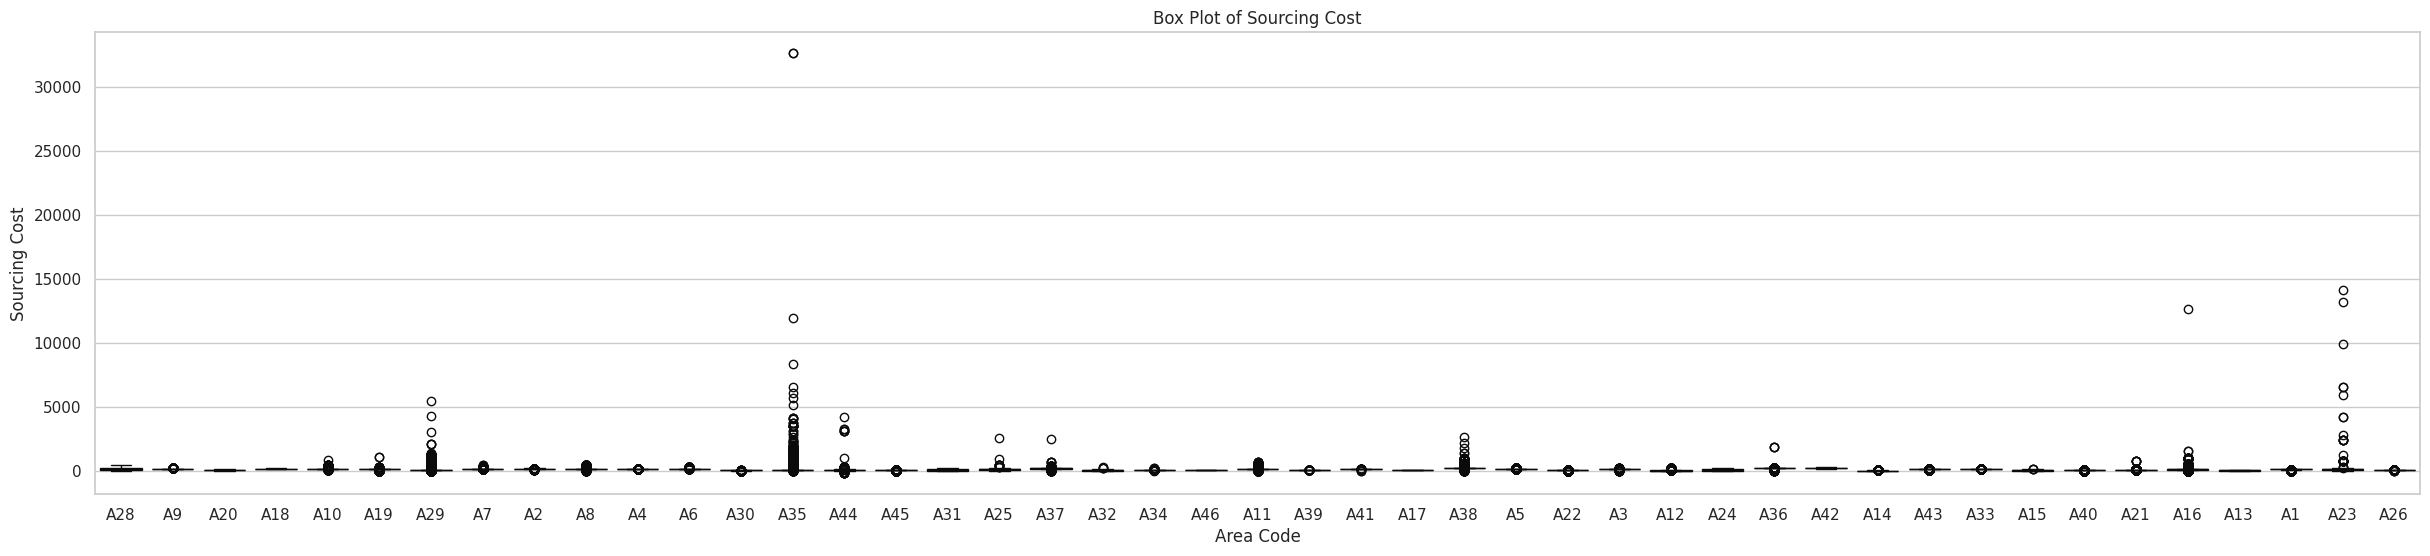

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(30, 6))  # Adjust width and height as needed

# Box plot for 'Sourcing Cost'
sns.boxplot(data=df, x="Area Code", y='Sourcing Cost', palette = "rocket")
plt.ylabel('Sourcing Cost')
plt.title('Box Plot of Sourcing Cost')
plt.show()

In [129]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set the size of the figure
# plt.figure(figsize=(15, 10))  # Adjust width and height as needed

# # Box plot for 'Sourcing Cost'
# sns.boxplot(data=df, y="Sourcing Cost", x='Manufacturer', palette = "rocket")
# plt.ylabel('Sourcing Cost')
# plt.title('Box Plot of Sourcing Cost')
# plt.show()

#Applying regression ML model :-
## Random forest :
## We very well recieve a fine score of rmse of almost 35 to 39.

In [127]:
## Splitting and handeling data .

X_train = df.drop(columns=['Sourcing Cost'])
y_train = df['Sourcing Cost']

X_test = df_test.drop(columns=['Sourcing Cost'])
y_test = df_test['Sourcing Cost']

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']

# Define preprocessor with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define the pipeline with preprocessor and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the training data into features and target variable
X_train = df.drop(columns=['Sourcing Cost'])
y_train = df['Sourcing Cost']

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the validation set
predictions = pipeline.predict(X_test)

# Evaluate the predictions
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 1532.5631955421015
Mean Absolute Error: 20.324530018937285
Root Mean Squared Error: 39.14796540743978


#Decision Tree Regressor :

#### Gives RMSE almost 35 to 38



In [128]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Categorical features needing encoding
categorical_features = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']

# Define preprocessor with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define the pipeline with preprocessor and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=100))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
predictions = pipeline.predict(X_test)

# Evaluate the predictions
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

# Output evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 1485.9391864533711
Mean Absolute Error: 20.085084908577443
Root Mean Squared Error: 38.54788173756596


#ARIMA : (For time series analysis)

In [121]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Aggregate data by month
train_data_monthly = df.groupby(['Month of Sourcing']).agg({'Sourcing Cost': 'sum'}).reset_index()

# Fit ARIMA model
model = ARIMA(train_data_monthly['Sourcing Cost'], order=(2, 2, 0))
fit_model = model.fit()

# Forecast June 2021 numbers using the trained ARIMA model
forecast = fit_model.forecast(steps=len(df_test))

# Print the forecasted values for June 2021
print("Forecasted Sourcing Costs for June 2021:")
print(forecast)

Forecasted Sourcing Costs for June 2021:
11     5.880444e+06
12     5.653751e+06
13     5.538316e+06
14     5.428883e+06
15     5.290345e+06
           ...     
102   -5.810644e+06
103   -5.938263e+06
104   -6.065882e+06
105   -6.193500e+06
106   -6.321119e+06
Name: predicted_mean, Length: 96, dtype: float64


In [122]:
actual_values = df_test['Sourcing Cost']
rmse_arima = np.sqrt(mean_squared_error(actual_values, forecast))
print("RMSE for ARIMA Model:", rmse_arima)

RMSE for ARIMA Model: 3546903.0356585947


# <b> <u> 1. Scale of Data and Model Suitability </u>
####ARIMA Model: The exceptionally high RMSE of around 3,546,903 for the ARIMA model suggests it may not be well-suited to the dataset or the model configuration might not be optimal. ARIMA models are best for univariate time series where the data is not only stationary but also exhibits clear patterns or cycles. If the data has multiple influencing factors and interactions (as yours likely does, given the multiple product attributes), ARIMA may struggle without significant preprocessing to stabilize the series.

####Random Forest: This model does not inherently account for the order of data (time), yet its much lower RMSE indicates it is capturing the relationships between features and the target more effectively. Random Forests are more flexible with multivariate data and can handle complex interactions between features well, which might be beneficial given the multiple categorical variables in your dataset.
#<b> <u> 2. Data Preprocessing </u>
####Non-Stationarity: If the time series data is not stationary, ARIMA will not perform well unless the data is differenced or transformed appropriately. The high RMSE might be indicating that the series is non-stationary or contains outliers or noise that hasn't been adequately addressed.
####Feature Engineering for ARIMA: You may need to reconsider how the time series data is being prepared for the ARIMA model, including checking for seasonality, trend decomposition, and appropriate differencing.

# <b> <u> Conclusion :- </u>

#### 1.Initiating our exploration with a comprehensive study of the dataset, we meticulously scrutinized the intricacies of product sourcing dynamics through an in-depth exploratory data analysis (EDA). Our dataset comprises a multitude of features, encompassing product type, manufacturer, area code, sourcing channel, product size, and more. Notably, we found the dataset to be devoid of any missing values, laying a solid foundation for our subsequent analytical endeavors.

#### 2.Beginning our investigation, we delved into the distribution of product types, unearthing that NTM2 products hold the lion's share. This observation prompted a deeper inquiry into the underlying factors contributing to NTM2's dominance. However, amidst the dataset's trove, a conspicuous outlier emerged in October 2020, where sourcing costs soared unusually high. This anomaly piqued our curiosity, urging us to probe further into potential aberrations within the dataset.

#### 3.Transitioning to sourcing channels, our analysis unveiled a prevailing preference for "Direct" sales channels, eclipsing alternative platforms. This revelation hinted at prevailing sourcing preferences among buyers. Moreover, a nuanced exploration into product size dynamics illuminated a discernible trend favoring "Powder" products over their "Liquid" counterparts, offering invaluable insights into consumer preferences and market dynamics.

#### 4.Venturing into temporal analysis, we scrutinized the dataset's temporal dimensions to ascertain the viability of employing traditional time series methodologies. Despite the temporal granularity, our examination failed to discern any discernible patterns, casting doubts on the efficacy of conventional time series techniques such as ARIMA. This skepticism was further reinforced by an unconventional seasonal plot, bereft of any conspicuous trends or patterns.

#### 5.Furthering our analytical voyage, we delved into sourcing patterns across manufacturers and area codes, unraveling intriguing insights into regional sourcing dynamics. Notably, Manufacturer X1 emerged as a pivotal player, underscoring its profound influence on overarching sourcing dynamics. However, the presence of an outlier in October 2020 raised pertinent questions regarding data integrity, necessitating a meticulous refinement of outlier detection methodologies.

#### 6.Embarking on predictive modeling endeavors, we harnessed the predictive prowess of Random Forest and Decision Tree Regressors to forecast sourcing costs. Impressively, both models exhibited commendable performance, eclipsing the traditionally venerable ARIMA model, which grappled with inherent limitations and accuracy concerns.

#### In conclusion, our decision to pursue basic machine learning models over traditional time series methodologies was guided by a series of critical considerations. The inherent complexity of our dataset, coupled with the lack of discernible temporal patterns, prompted us to opt for models like Random Forest and Decision Tree Regressors. These models offered the flexibility, scalability, and predictive performance necessary to accurately forecast sourcing costs in our dynamic procurement landscape, empowering businesses with actionable insights and strategic foresight.